In [67]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [69]:
from sklearn.datasets import load_boston

In [70]:
boston = load_boston()

In [71]:
print (boston.DESCR)
#Using describe method

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0.5, 0, 'Number of houses')

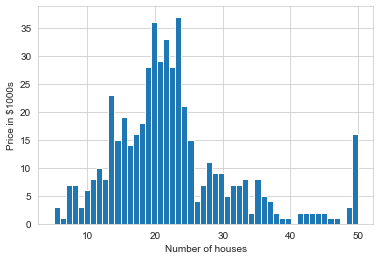

In [72]:
plt.hist(boston.target, bins=50)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

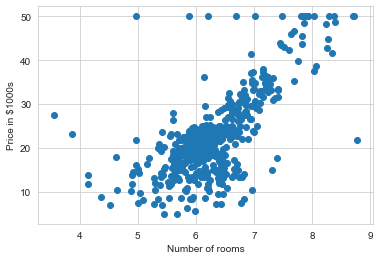

In [73]:
plt.scatter(boston.data[:,5],boston.target)
#return every attribute in the fifth column
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [74]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [75]:
#Reset data as pandas DataFrame
boston_df = DataFrame(boston.data)
#Label columns
boston_df.columns = boston.feature_names
#Show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [77]:
boston_df['Price'] = boston.target

In [78]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


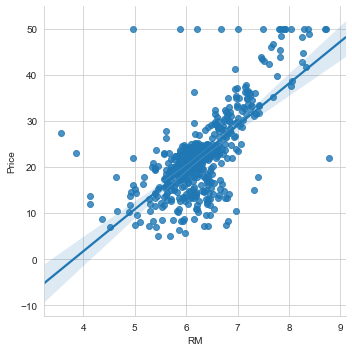

In [79]:
# Using seaborn to create a linear fit
sns.lmplot('RM','Price',data=boston_df)

In [80]:
#Quick display of image from wikipedia
from IPython.display import Image
url = 'http://uploa'

## Using Numpy for a Univariate Linear Regression

numpy has a built in least square method in its linear algebra library. Use this for the Univariate regression ( 单一变量）and then move on to scikit learn for our multi regression

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case, we have our values as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. so we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack too;, vstack

In [81]:
# Set up X as median room values
X = boston_df.RM
X.shape

(506,)

In [97]:
# Use v to make X two-dimensional
X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T
X.shape
#numpy knows how many values and how many attributes

(506, 2)

In [91]:
# Set up Y as the target price of the house
Y = boston_df.Price

In [92]:
# [X 1], dtype-np.float64)

In [93]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:
y=mx+b
which we can rewrite using matrices:
y=Ap
where:
A=[x1]
 
and
p=[mb]
 

This is the same as the first equation if you carry out the linear algebra. So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [94]:
# Now get out m and b values for our best fit line
m , b = np.linalg.lstsq(X,Y)[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


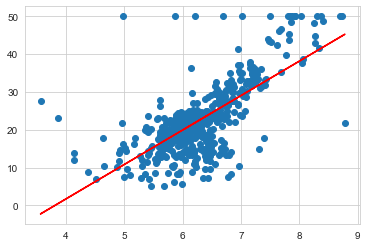

In [95]:
plt.plot(boston_df.RM, boston_df.Price,'o')
x = boston_df.RM
plt.plot(x, m*x+b,'r',label='Best Fit Line')
#color = r, red

# Getting the error

In [98]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)
print(result)
# Get the total error
error_total = result[1]
# Get the root mean square error
rmse = np.sqrt(error_total/len(X))#standard deviation
print('The root mean squared error was %.2f' %rmse)

(array([  9.10210898, -34.67062078]), array([22061.87919621]), 2, array([143.99484122,   2.46656609]))
The root mean squared error was 6.60


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Since the root mean square (RMSE) corresponds approximately to the standard deviation, the price of the house won't vary more than 2 times the RMSE 95% of the time. Normal distribution rule. Thus we can reasonably expect a house price to be within $ 6.6*2 thousands of our line fit

## Step 6: Use Scikit learn to implement a multivariate regression

In [99]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

We create a linear regression object, type lm, then press tab to see the list of methods availale on this object

In [100]:
#Create a Linear Regression object
lreg = LinearRegression()

The functions we will be using are:
lreg.fit() which fits a linear model
lreg.predict()which is used to predict Y using linear model with estimated coefficients
lreg.scrore() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](https://en.wikipedia.org/wiki/Coefficient_of_determination)
We'll start the multi variable regression analysis by separating our boston dataframe into the data columns and the target columns

In [101]:
# Data Columns
X_multi = boston_df.drop('Price',1)
#Targets
Y_target = boston_df.Price

Pass the X and Y using the linear regression object

In [102]:
# Implement Linear Regression
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
#Intercepts and coefficients
print('The estimated intercept coefficient is %.2f' %lreg.intercept_)
print('The number of coefficients used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients used was 13


We have basically made an equation for a line, but instead of just one coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the [document](https://scikit-learn.org/stable/modules/linear_model.html) for this equation:
y(w,x)=w0+w1x1+...+wpxp

Where
w=(w1,...wp)
as the coefficients and
w0
as the intercept

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained from the linear regression.

In [107]:
coeff_df.columns

Index(['Features', 'Coefficient Estimate'], dtype='object')

In [108]:
# Set a DataFrame form the features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
#Set a new column lining up the coefficients from the linear regression
coeff_df

,Features
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [106]:
# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms. Now let's move on to Predicting prices

## Using Training and Validation
In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.
Scikit learn has a built in function specifically for this called train_test_split.
The parameters passed are X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. 

In [111]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,boston_df.Price)

In [112]:
# Print the shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


## Predicting Prices
Use the training set for the prediction and then use the testing set for validation

In [115]:
# Create the regression object
lreg = LinearRegression()
#Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now run a prediction on both the X training set and the testing set

In [116]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Now we will get the mean square error

In [117]:
print('Fit a model X_train, and calculate MSE with Y_train: %.2f' %np.mean((Y_train-pred_train)**2))
print('Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f' %np.mean((Y_test-pred_test)**2))



Fit a model X_train, and calculate MSE with Y_train: 44.49
Fit a model X_train, and calculate MSE with X_test and Y_test: 41.20


## Residual Plots
Residual = Observed value - Predicted value
A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in the residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; Otherwise, a non-linear model is more appropriate.
Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some structure or pattern, that means your is not capturing something. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and checkn your data set closely.

[Residual plot](https://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis)

Text(0.5, 1.0, 'Residual Plots')

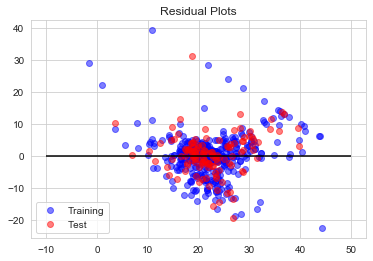

In [121]:
# Scatter plot the training data
train = plt.scatter(pred_train, (Y_train-pred_train),c='b',alpha=0.5)
# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test), c='r',alpha=0.5)
# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)
#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Great. Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal. We could also use seaborn to create these plots:

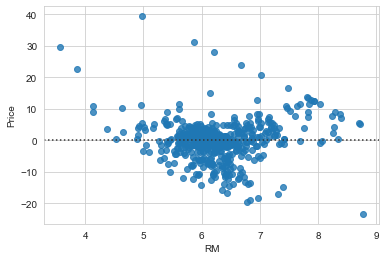

In [122]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM','Price',data = boston_df)

[Read this](http://scikit-learn.org/stable/modules/linear_model.html#linear-model)